<a href="https://colab.research.google.com/github/Biruk-gebru/Icog-classes/blob/main/Object_Detection_with_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  YOLOv8 Object Detection with COCO128 Dataset

This Colab notebook demonstrates how to train, evaluate, and visualize a **YOLOv8 object detection model** using the lightweight **COCO128 dataset**. It uses the **Ultralytics YOLOv8 framework** and guides you through each step, from dataset setup to visualizing predictions.

---

##  What This Notebook Does
- Downloads and prepares the **COCO128** dataset (a smaller version of COCO for fast experimentation).
- Trains a **YOLOv8n** (nano) model on the dataset.
- Visualizes predictions with **bounding boxes** on validation images.

---

##  Dataset Used
- **COCO128**: [Kaggle Link](https://www.kaggle.com/datasets/ultralytics/coco128)
- Format: YOLOv8-compatible annotations.

---

##  Tools & Libraries
- [Ultralytics YOLOv8](https://github.com/ultralytics/ultralytics)
- Python 3.11
- Colab environment (supports GPU acceleration)

---

##  Steps Covered
1. **Setup**: Install YOLOv8 and configure environment.
2. **Dataset**: Download COCO128 from Kaggle and extract.
3. **Model Training**: Train YOLOv8n model for 10 epochs.
4. **Prediction Visualization**: Predict on validation set and display results with bounding boxes.
5. Save and reuse trained model weights.

---


## Environment Setup

1. Install the required YOLOv8 dependencies.
2. Authenticate with Kaggle to download datasets.


In [1]:
# Install YOLOv8 (Ultralytics)
!pip install ultralytics --upgrade -q

# Create Kaggle directory and upload your kaggle.json
!mkdir -p ~/.kaggle
from google.colab import files
uploaded = files.upload()  # Upload kaggle.json here

# Move kaggle.json to the right place and set permissions
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00


Saving kaggle.json to kaggle.json


## Download COCO128 Dataset

Download and unzip the `coco128` dataset from Kaggle for quick and efficient YOLOv8 training.


In [2]:
# Download coco128 dataset from Kaggle
!kaggle datasets download -d ultralytics/coco128

# Unzip the dataset
!unzip -q coco128.zip -d coco128_dataset


Dataset URL: https://www.kaggle.com/datasets/ultralytics/coco128
License(s): GNU Affero General Public License 3.0
  0% 0.00/6.66M [00:00<?, ?B/s]
100% 6.66M/6.66M [00:00<00:00, 78.5MB/s]


## Dataset Structure

Ensure the dataset has the correct folder structure:
- `coco128_dataset/coco128/images/train2017/`
- `coco128_dataset/coco128/labels/train2017/`


In [3]:
# Check folder structure
!ls -R coco128_dataset/coco128


coco128_dataset/coco128:
images	labels	LICENSE  README.txt

coco128_dataset/coco128/images:
train2017

coco128_dataset/coco128/images/train2017:
000000000009.jpg  000000000138.jpg  000000000315.jpg  000000000436.jpg	000000000562.jpg
000000000025.jpg  000000000142.jpg  000000000321.jpg  000000000438.jpg	000000000564.jpg
000000000030.jpg  000000000143.jpg  000000000322.jpg  000000000443.jpg	000000000569.jpg
000000000034.jpg  000000000144.jpg  000000000326.jpg  000000000446.jpg	000000000572.jpg
000000000036.jpg  000000000149.jpg  000000000328.jpg  000000000450.jpg	000000000575.jpg
000000000042.jpg  000000000151.jpg  000000000332.jpg  000000000459.jpg	000000000581.jpg
000000000049.jpg  000000000154.jpg  000000000338.jpg  000000000471.jpg	000000000584.jpg
000000000061.jpg  000000000164.jpg  000000000349.jpg  000000000472.jpg	000000000589.jpg
000000000064.jpg  000000000165.jpg  000000000357.jpg  000000000474.jpg	000000000590.jpg
000000000071.jpg  000000000192.jpg  000000000359.jpg  000000000

## Train YOLOv8 Model on COCO128

We’ll use the `YOLOv8n` (nano) model for fast training.


In [5]:
#download the .yamal file from the offical github
!wget https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/datasets/coco128.yaml -P coco128_dataset/


--2025-03-17 09:51:28--  https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/cfg/datasets/coco128.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978 (1.9K) [text/plain]
Saving to: ‘coco128_dataset/coco128.yaml’

coco128.yaml        100%[===================>]   1.93K  --.-KB/s    in 0s      

2025-03-17 09:51:29 (27.2 MB/s) - ‘coco128_dataset/coco128.yaml’ saved [1978/1978]



In [6]:
from ultralytics import YOLO

# Load YOLOv8 nano model
model = YOLO('yolov8n.pt')

# Train on coco128 dataset (YOLOv8 has built-in support for this dataset)
results = model.train(
    data='coco128_dataset/coco128.yaml',  # Path to YAML config file
    epochs=10,
    imgsz=640,
    batch=16,
    project='yolo_coco128_train',
    name='exp1'
)


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128_dataset/coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolo_coco128_train, name=exp12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 6.66M/6.66M [00:00<00:00, 74.1MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 2110.19file/s]

Dataset download success ✅ (0.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 979.01it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to yolo_coco128_train/exp12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolo_coco128_train/exp12
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.157       1.39      1.195         78        640: 100%|██████████| 8/8 [02:12<00:00, 16.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:47<00:00, 11.87s/it]

                   all        128        929      0.664      0.524      0.613      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.178      1.377      1.211        106        640: 100%|██████████| 8/8 [02:09<00:00, 16.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:45<00:00, 11.31s/it]

                   all        128        929      0.659      0.569      0.638      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.132      1.286      1.185        107        640: 100%|██████████| 8/8 [02:02<00:00, 15.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.75s/it]

                   all        128        929      0.663      0.604      0.652      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.151      1.269      1.205         93        640: 100%|██████████| 8/8 [01:57<00:00, 14.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.54s/it]

                   all        128        929      0.702      0.605       0.66      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.111      1.256      1.175         52        640: 100%|██████████| 8/8 [02:05<00:00, 15.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.44s/it]

                   all        128        929      0.731      0.602      0.673      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.113      1.196      1.188        102        640: 100%|██████████| 8/8 [01:59<00:00, 14.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:41<00:00, 10.30s/it]

                   all        128        929      0.679      0.641      0.681      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.092       1.15      1.173        188        640: 100%|██████████| 8/8 [01:57<00:00, 14.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.65s/it]

                   all        128        929      0.686       0.64      0.686      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.093      1.161      1.149        141        640: 100%|██████████| 8/8 [01:56<00:00, 14.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.03s/it]

                   all        128        929      0.698      0.637      0.691      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.115      1.111      1.182        104        640: 100%|██████████| 8/8 [01:58<00:00, 14.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.88s/it]

                   all        128        929      0.786      0.609      0.699      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.058      1.111       1.15        107        640: 100%|██████████| 8/8 [01:59<00:00, 14.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:43<00:00, 10.95s/it]

                   all        128        929      0.776      0.609        0.7      0.533



10 epochs completed in 0.461 hours.
Optimizer stripped from yolo_coco128_train/exp12/weights/last.pt, 6.5MB
Optimizer stripped from yolo_coco128_train/exp12/weights/best.pt, 6.5MB

Validating yolo_coco128_train/exp12/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:35<00:00,  8.84s/it]


                   all        128        929      0.787      0.609        0.7      0.534
                person         61        254      0.885      0.633      0.779       0.57
               bicycle          3          6          1      0.318      0.364      0.324
                   car         12         46      0.774      0.217      0.313      0.193
            motorcycle          4          5       0.71        0.8      0.938      0.756
              airplane          5          6      0.848      0.934      0.972       0.85
                   bus          5          7      0.801      0.575      0.699      0.644
                 train          3          3      0.864          1      0.995      0.907
                 truck          5         12      0.931        0.5      0.541      0.364
                  boat          2          6      0.866      0.333      0.648      0.391
         traffic light          4         14      0.525      0.143      0.191      0.142
             stop sig

#Evaluate the Model (IoU, mAP, etc.)
After training, YOLOv8 provides a method to evaluate the model on a validation set and calculate metrics like:

**IoU** — how well predicted bounding boxes overlap with ground truth


**mAP50 / mAP50-95** — mean Average Precision at different IoU thresholds

In [23]:
metrics = model.val()  # This uses the validation data specified in coco128.yaml

# Print out key metrics
print(f"IoU (Box): {metrics.box.map50:.4f}")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<00:00,  3.94s/it]


                   all        128        929      0.761      0.599      0.693       0.53
                person         61        254      0.874       0.63      0.781      0.568
               bicycle          3          6          1      0.319      0.362      0.322
                   car         12         46      0.773      0.217      0.315      0.194
            motorcycle          4          5      0.677      0.841      0.938      0.756
              airplane          5          6      0.848      0.936      0.972       0.85
                   bus          5          7          1      0.689      0.722      0.665
                 train          3          3      0.862          1      0.995      0.907
                 truck          5         12          1      0.485      0.541       0.36
                  boat          2          6       0.65      0.333      0.557      0.331
         traffic light          4         14      0.523      0.143      0.179       0.14
             stop sig

## YOLO Model Prediction  

This code snippet demonstrates how to load a pre-trained YOLO (You Only Look Once) model and use it to make predictions on a set of validation images.


In [15]:
# Load the trained model
model = YOLO('yolo_coco128_train/exp12/weights/best.pt')

# Predict on validation images and save the results
results = model.predict(
    source='coco128_dataset/coco128/images/train2017',  # Path to validation images
    save=True,        # Save results with bounding boxes
    conf=0.25,        # Confidence threshold
    imgsz=640         # Image size (should match training size)
)



image 1/128 /content/coco128_dataset/coco128/images/train2017/000000000009.jpg: 480x640 3 bowls, 3 oranges, 1 broccoli, 1 hot dog, 327.6ms
image 2/128 /content/coco128_dataset/coco128/images/train2017/000000000025.jpg: 448x640 2 giraffes, 295.2ms
image 3/128 /content/coco128_dataset/coco128/images/train2017/000000000030.jpg: 448x640 1 potted plant, 1 vase, 256.6ms
image 4/128 /content/coco128_dataset/coco128/images/train2017/000000000034.jpg: 448x640 1 zebra, 256.3ms
image 5/128 /content/coco128_dataset/coco128/images/train2017/000000000036.jpg: 640x512 1 person, 1 umbrella, 338.3ms
image 6/128 /content/coco128_dataset/coco128/images/train2017/000000000042.jpg: 480x640 1 dog, 1 teddy bear, 303.3ms
image 7/128 /content/coco128_dataset/coco128/images/train2017/000000000049.jpg: 640x512 7 persons, 3 horses, 1 potted plant, 328.0ms
image 8/128 /content/coco128_dataset/coco128/images/train2017/000000000061.jpg: 512x640 1 person, 2 elephants, 341.1ms
image 9/128 /content/coco128_dataset/coc

After training, we run inference on validation images and visualize the predicted bounding boxes.

The code below loads and displays the first 5 prediction results from the validation set.

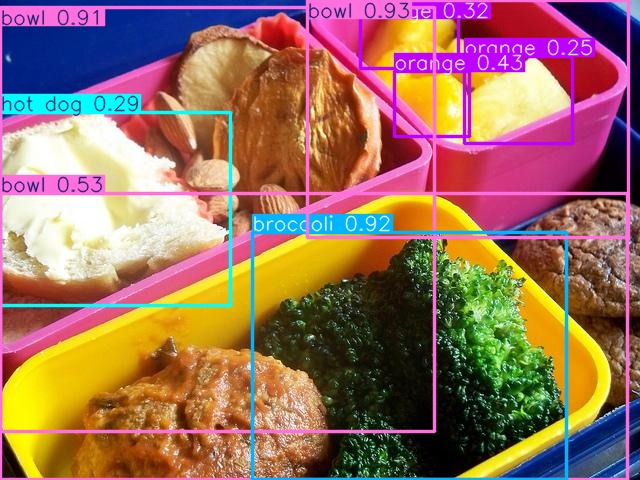

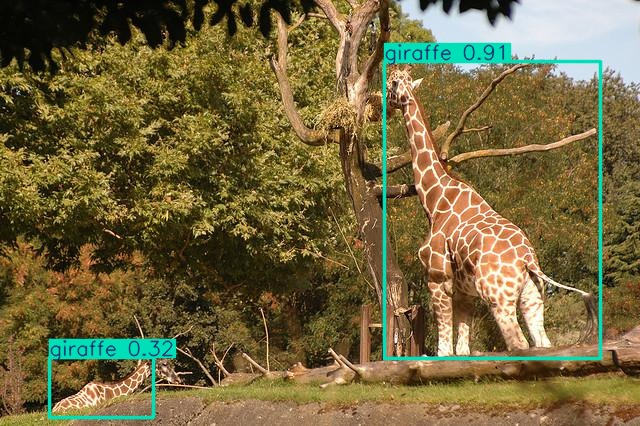

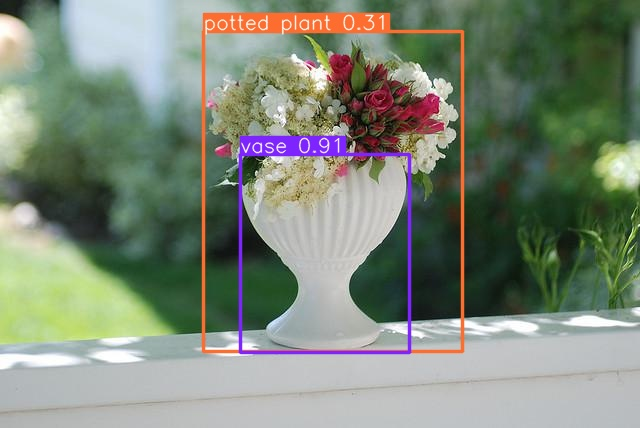

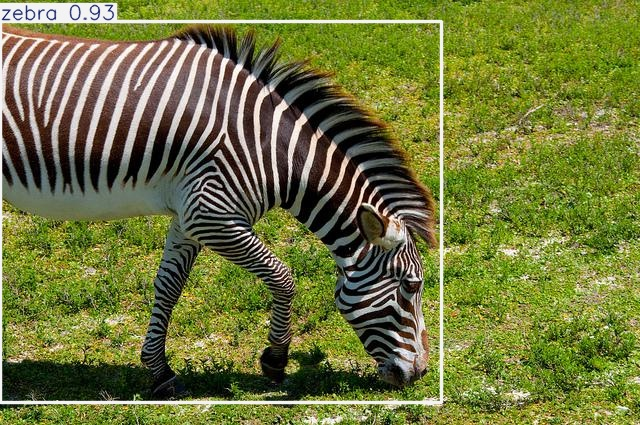

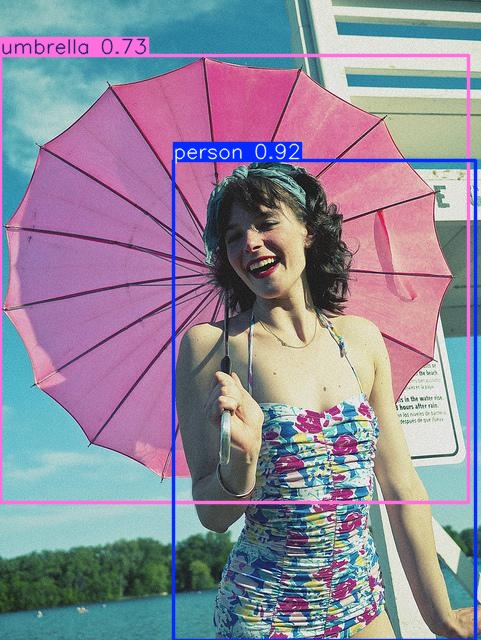

In [16]:
import glob
from IPython.display import Image, display

# Load and display saved prediction images
prediction_images = sorted(glob.glob('runs/detect/predict/*.jpg'))

for img_path in prediction_images[:5]:  # Show first 5 predictions
    display(Image(filename=img_path))


## Save Trained Model to Google Drive


In [22]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Copy best model weights
!cp yolo_coco128_train/exp12/weights/best.pt /content/drive/MyDrive/


Mounted at /content/drive
